# <font color='red'>Advanced_Plotting_Script</font> 

## Path to source parent directory

In [1]:
# file_path_bin = "D:/MASS/24 inch data/Sample Data imp"
file_path_bin = "D:/MASS/14 inch IPIG ILI run data/IOCL_PANIPAT_AMBALA_NI DAS_30_31_JULY_2015/Data"
# file_path_cd = "/home/alethe/Documents/Analysis_Data/IOCL_DELHI_PANIPAT_RUN_5_DEC_2015/Individual_CD"
feature = 'flange'

## Required libraries for support and display settings

In [3]:
%matplotlib inline
import array
import numpy as np                                        
import pandas as pd
from pathlib import Path
import openpyxl
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from pylab import rcParams
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)

In [26]:
individual_cd = {}
pathlist = Path(file_path_bin).glob('**/*.bin')
SplitPath = {}
for pathObj in pathlist:
    path_in_str = str(pathObj)
#     print(path_in_str)
#     SplitPath = int(path_in_str.split('/')
#     individual_cd[] = SplitPath[len(SplitPath)-1]].split('_')[0]

In [27]:
for k in individual_cd:
    print(k, individual_cd[k])

In [33]:
cd_name = 1
page_number = 727
sigma_for_filtering = 5
distance_count = 5000  

D:\MASS\14 inch IPIG ILI run data\IOCL_PANIPAT_AMBALA_NI DAS_30_31_JULY_2015\Data\DATA_9_31.07.2015_05.53.13.bin
164
page number 727 processed


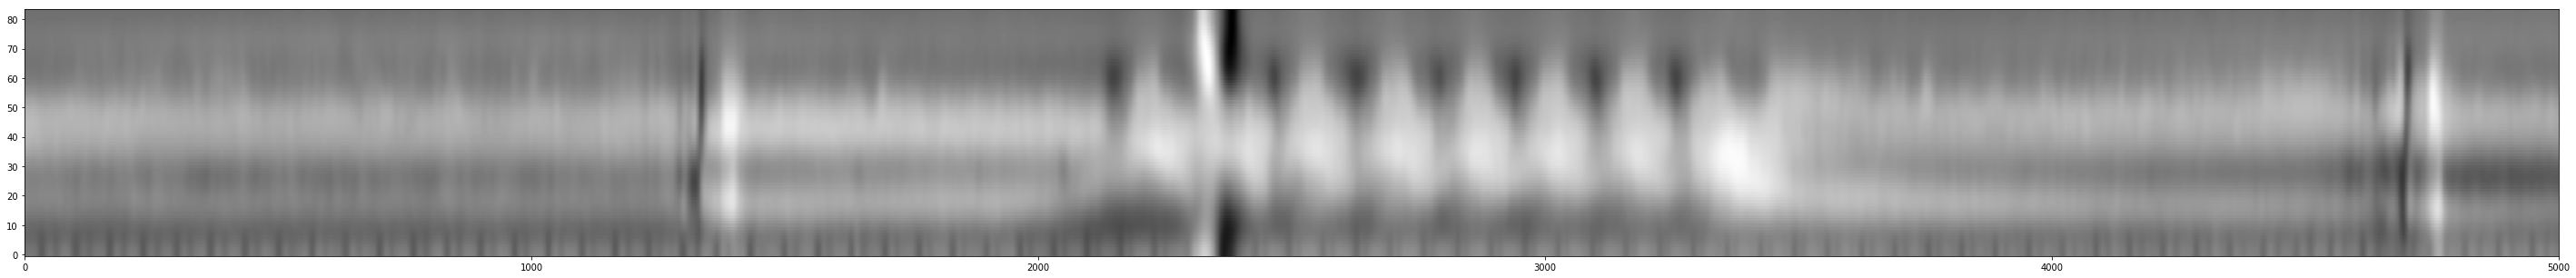

In [125]:
# sFileName = individual_cd[cd_name]               
file_path = path_in_str
print(file_path)
primary_sensors_count = 84                                
secondary_sensors_count = 72                              
other_sensors_count = 8
pri_skip = 1
sec_skip = 1
other_skip = 1
last_primary_channel = primary_sensors_count*pri_skip
last_secondary_channel = last_primary_channel + secondary_sensors_count*sec_skip
last_other_channel = last_secondary_channel  + other_sensors_count*other_skip
max_channels = last_other_channel
primary_data = np.zeros((primary_sensors_count, distance_count), dtype = np.float)
secondary_data = np.zeros((secondary_sensors_count, distance_count), dtype = np.float)
other_data = np.zeros((other_sensors_count, distance_count), dtype = np.float)
buffer = np.zeros((max_channels, distance_count), dtype = np.float)

print(max_channels)
marker_list = []

for num in range(page_number, page_number + 1):
    fid = open(file_path, 'rb')
    fid.seek(0,0)
    fid.seek(num*(primary_sensors_count + secondary_sensors_count + other_sensors_count)*distance_count*1,0)
    print("page number "+ str(num) + " processed")
    arr = array.array("b")
    arr.fromfile(fid, ((max_channels)*distance_count))
    fid.close()
    k = 0
    for iota in range(0, distance_count):
        for j in range(0, max_channels):
            buffer[j,iota]=arr[k]
            k=k+1
    
    p1 = 0     
    for channel in range(0, last_primary_channel):
        for samp in range(0, distance_count):
            temp = buffer[channel,samp]
            temp2 = 511
            primary_data[p1, samp] = ((temp*4) + temp2)*5/2048
        p1 = p1 + 1
        
    p2 = 0     
    for channel in range(last_primary_channel, last_secondary_channel):
        for samp in range(0, distance_count):
            temp = buffer[channel,samp]
            temp2 = 511
            secondary_data[p2, samp] = ((temp*4) + temp2)*5/2048
        p2 = p2 + 1
        
    p3 = 0     
    for channel in range(last_secondary_channel, last_other_channel):
        for samp in range(0, 5000):
            temp = buffer[channel,samp]
#             temp2 = 511
#             other_data[p3, samp] = ((temp*4) + temp2)*5/2048 
            other_data[p3, samp] = temp
        p3 = p3 + 1
        
    pri_parent = [primary_data]
    sec_parent = [secondary_data]
    other_parent = [other_data]

    for value in range(0, len(pri_parent)):
        pri_parent[value] = pd.DataFrame(pri_parent[value]).transpose().dropna()
    for value in range(0, len(sec_parent)):
        sec_parent[value] = pd.DataFrame(sec_parent[value]).transpose().dropna()
    for value in range(0, len(other_parent)):
        other_parent[value] = pd.DataFrame(other_parent[value]).transpose().dropna()

    var1 = pri_parent[0].copy()
    var2 = sec_parent[0].copy()
    var3 = other_parent[0].copy()
    
    scaler = MinMaxScaler()
    var1 = pd.DataFrame(scaler.fit_transform(var1))
    var1 = pd.DataFrame(gaussian_filter(var1, sigma=sigma_for_filtering))
    var2 = pd.DataFrame(scaler.fit_transform(var2))
    var2 = pd.DataFrame(gaussian_filter(var2, sigma=sigma_for_filtering))
    var3 = pd.DataFrame(scaler.fit_transform(var3))
    rcParams['figure.figsize'] = 50, 5
    x = np.arange(0, distance_count + 1)
    y = np.array([0, 84])
    data1 = var1.transpose()
    plt.gray()
    plt.imshow(data1, aspect='auto', interpolation='nearest', origin='lower')
#     image_folder_path = "D:/MASS/24 inch data/images/"
#     plt.savefig(image_folder_path + 'pri_' + str(num))
#     plt.imshow(data1,aspect='auto', interpolation='nearest')
#     plt.contour()

## Visualizing pipe profile

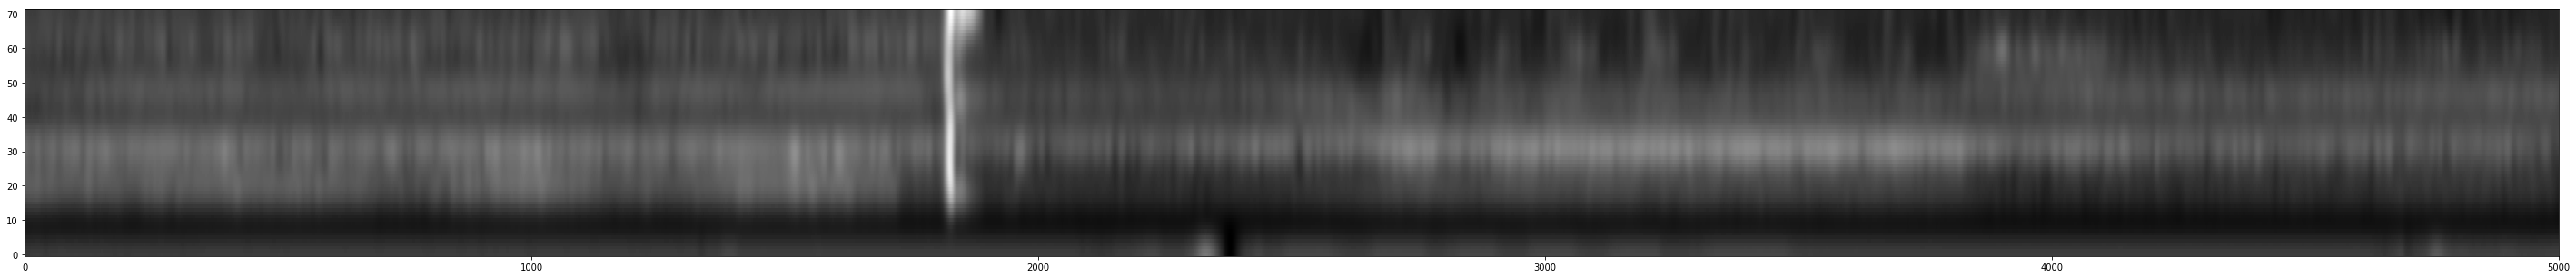

In [126]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 50, 5
x = np.arange(0, distance_count + 1)
y = np.array([0, 84])
data2 = var2.transpose()
plt.gray()
plt.imshow(data2, aspect='auto', interpolation='nearest', origin='lower')

# Visualizing a particular sensor or a group of sensors

In [127]:
value = 1440
cut = 300
start = value - cut
end = value + cut

sid = var1.iloc[start:end,:].std().idxmax()
print("Max Variation Sensor is", sid)

('Max Variation Sensor is', 19)


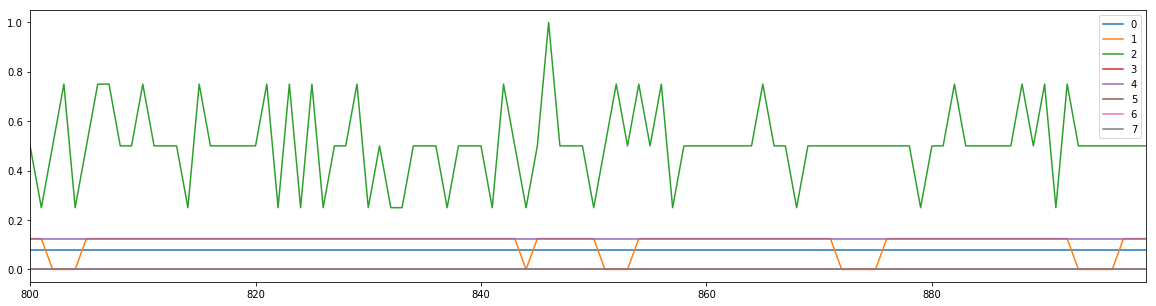

In [128]:
#var1.iloc[start:end,sid:sid+1].plot(figsize=(10,10), ylim=(0,1), legend=False)
var3.iloc[800:900,0:8].plot(figsize=(20,5), legend=True)

In [113]:
var3[7].unique()

array([ 149.,  152.,  153.,  155.,  150.,  151.,  148.,  157.,  158.,
        159.,  156.,  154.])

In [106]:
#var1.iloc[start:end,sid:sid+1].to_csv('/home/alethe/Desktop/DEMO/Conduct_Test/Run_Analysis/marker_test.csv', header=None, index=None)

# Analyzing data in frequency domain

In [ ]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
order = 5
fs = 2000.0       
cutoff = 0.9 

y = butter_lowpass_filter(primary_data[78], cutoff, fs, order)
low_pass_data = pd.DataFrame()

low_pass_data[0] = y
low_pass_data[4] = low_pass_data[0].mean() + low_pass_data[0].std()*3
low_pass_data[6] = low_pass_data[0].mean() - low_pass_data[0].std()*3

low_pass_data.plot(figsize = (30,5), xticks = np.arange(0,distance_count,100), legend=False)

# Feature_Collection

In [ ]:
individual_cd_1 = {}
pathlist = Path(file_path_cd).glob('**/*.xlsx')
for pathObj in pathlist:
    path_in_str = str(pathObj)
    print(path_in_str)
    cd_data = pd.read_excel(path_in_str, sheetname='Sheet3')
    cd_data.columns = np.arange(0,len(cd_data.columns))
    cd_data = cd_data[[1,3,4,11,5]].dropna(thresh = 1)
    cd_data[11] = cd_data[11].str.lower()
    cd_data = cd_data[cd_data[11].str.contains(feature)]
    cd_data.columns = ['Page_Number', '5k_Sample_Count', 'Abs_Val', 'Feature', 'Central_Sensor']
    key = int(path_in_str.split('/')[7].split('_')[1])
    
    individual_cd_1['CD_' + str(key)] = []
    individual_cd_1['CD_' + str(key)].append(cd_data)
        
pathlist = Path(file_path_bin).glob('**/*.bin')
for pathObj in pathlist:
    path_in_str = str(pathObj)
    key  = 'CD_' + path_in_str.split('/')[7].split('_')[1]
    for value in individual_cd_1:
        if (value == key):
            individual_cd_1[value].append(path_in_str.split('/')[7])

In [ ]:
individual_cd_1["CD_7"][0]